# Data z pd pyth3 df do sqlite3

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import string as st
import datetime
import seaborn as sns
from collections import namedtuple
import traceback

C:\Users\cerny\AppData\Local\Temp\ipykernel_11188\1038689534.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# in parentheses, press shift+tab
try:
    pd.read_csv()
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\cerny\AppData\Local\Temp\ipykernel_11188\1588110766.py", line 3, in <module>
    pd.read_csv()
TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'


In [3]:
pd.set_option('display.max.rows', 15)
pd.set_option('display.max.columns', 20)

In [4]:
# con = sqlite3.connect('test.db') # je taky blbě
con = sqlite3.connect(':memory:')

In [5]:
np.random.seed(42)
data = np.random.randint(1, 100, size = (1000, 5))
data

array([[52, 93, 15, 72, 61],
       [21, 83, 87, 75, 75],
       [88, 24,  3, 22, 53],
       ...,
       [94, 22, 33, 30, 81],
       [32, 42, 78, 10, 36],
       [34, 73, 28, 11, 78]])

In [6]:
data.shape

(1000, 5)

In [7]:
data.size

5000

In [8]:
data.dtype

dtype('int32')

In [9]:
st.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [10]:
numCols=data.shape[1]
abc=list(st.ascii_uppercase[:numCols])
abc

['A', 'B', 'C', 'D', 'E']

In [11]:
i = pd.date_range(start=datetime.datetime.now().date(), periods=data.shape[0], freq='D')
i

DatetimeIndex(['2025-03-15', '2025-03-16', '2025-03-17', '2025-03-18',
               '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-22',
               '2025-03-23', '2025-03-24',
               ...
               '2027-11-30', '2027-12-01', '2027-12-02', '2027-12-03',
               '2027-12-04', '2027-12-05', '2027-12-06', '2027-12-07',
               '2027-12-08', '2027-12-09'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [12]:
df = pd.DataFrame(data, columns = abc, index = i)
df

,A,B,C,D,E
2025-03-15,52,93,15,72,61
2025-03-16,21,83,87,75,75
2025-03-17,88,24,3,22,53
2025-03-18,2,88,30,38,2
2025-03-19,64,60,21,33,76
...,...,...,...,...,...
2027-12-05,13,32,46,23,45
2027-12-06,17,85,66,6,18
2027-12-07,94,22,33,30,81
2027-12-08,32,42,78,10,36


In [13]:
df.to_sql(con=con, name='Moje1', if_exists='replace')

1000

In [14]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[('2025-03-15 00:00:00', 52, 93, 15, 72, 61),
 ('2025-03-16 00:00:00', 21, 83, 87, 75, 75),
 ('2025-03-17 00:00:00', 88, 24, 3, 22, 53),
 ('2025-03-18 00:00:00', 2, 88, 30, 38, 2),
 ('2025-03-19 00:00:00', 64, 60, 21, 33, 76),
 ('2025-03-20 00:00:00', 58, 22, 89, 49, 91),
 ('2025-03-21 00:00:00', 59, 42, 92, 60, 80),
 ('2025-03-22 00:00:00', 15, 62, 62, 47, 62),
 ('2025-03-23 00:00:00', 51, 55, 64, 3, 51),
 ('2025-03-24 00:00:00', 7, 21, 73, 39, 18)]

In [15]:
df = pd.read_sql(con=con, sql='select * from Moje1')
df

,index,A,B,C,D,E
0,2025-03-15 00:00:00,52,93,15,72,61
1,2025-03-16 00:00:00,21,83,87,75,75
2,2025-03-17 00:00:00,88,24,3,22,53
3,2025-03-18 00:00:00,2,88,30,38,2
4,2025-03-19 00:00:00,64,60,21,33,76
...,...,...,...,...,...,...
995,2027-12-05 00:00:00,13,32,46,23,45
996,2027-12-06 00:00:00,17,85,66,6,18
997,2027-12-07 00:00:00,94,22,33,30,81
998,2027-12-08 00:00:00,32,42,78,10,36


In [16]:
df.dtypes

index    object
A         int64
B         int64
C         int64
D         int64
E         int64
dtype: object

In [17]:
df.index = df['index']
df.drop(columns=['index'], inplace=True)
df

,A,B,C,D,E
index,,,,,
2025-03-15 00:00:00,52,93,15,72,61
2025-03-16 00:00:00,21,83,87,75,75
2025-03-17 00:00:00,88,24,3,22,53
2025-03-18 00:00:00,2,88,30,38,2
2025-03-19 00:00:00,64,60,21,33,76
...,...,...,...,...,...
2027-12-05 00:00:00,13,32,46,23,45
2027-12-06 00:00:00,17,85,66,6,18
2027-12-07 00:00:00,94,22,33,30,81


In [18]:
df.index.dtype

dtype('O')

In [19]:
df.index = pd.to_datetime(df.index)
df

,A,B,C,D,E
index,,,,,
2025-03-15,52,93,15,72,61
2025-03-16,21,83,87,75,75
2025-03-17,88,24,3,22,53
2025-03-18,2,88,30,38,2
2025-03-19,64,60,21,33,76
...,...,...,...,...,...
2027-12-05,13,32,46,23,45
2027-12-06,17,85,66,6,18
2027-12-07,94,22,33,30,81


In [20]:
df.index.dtype

dtype('<M8[ns]')

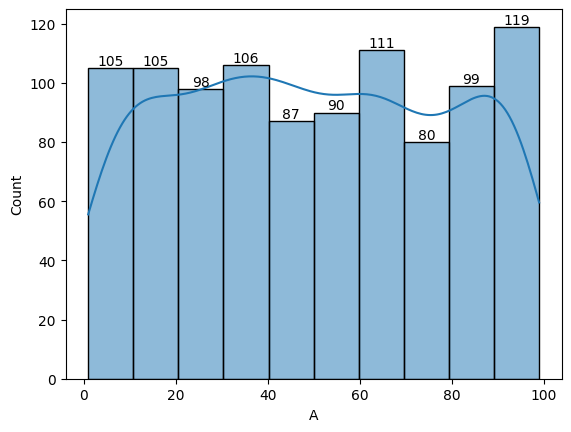

In [21]:
ax = sns.histplot(df['A'], bins=10, kde=True)
for container in ax.containers:
    ax.bar_label(container)

In [22]:
hist, bin_edges = np.histogram(df['A'], bins=10)

In [23]:
hist

array([105, 105,  98, 106,  87,  90, 111,  80,  99, 119], dtype=int64)

In [24]:
bin_edges

array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ])

In [25]:
df['A'].min()

1

In [26]:
df['A'].max()

99

In [27]:
df['A CAT'] = pd.cut(df['A'], bins=bin_edges, right=False)

In [28]:
df['A CAT'].value_counts(sort=False)

A CAT
[1.0, 10.8)     105
[10.8, 20.6)    105
[20.6, 30.4)     98
[30.4, 40.2)    106
[40.2, 50.0)     87
[50.0, 59.8)     90
[59.8, 69.6)    111
[69.6, 79.4)     80
[79.4, 89.2)     99
[89.2, 99.0)    100
Name: count, dtype: int64

In [29]:
df[df['A CAT'].isna()]

,A,B,C,D,E,A CAT
index,,,,,,
2025-04-12,99,47,78,3,1,NaN
2025-05-13,99,19,48,80,3,NaN
2025-05-16,99,89,99,25,93,NaN
2025-06-05,99,50,25,24,13,NaN
2025-12-23,99,86,24,81,74,NaN
...,...,...,...,...,...,...
2027-03-22,99,45,73,53,30,NaN
2027-04-16,99,82,86,24,19,NaN
2027-07-28,99,48,56,64,59,NaN


# update  table with columns - using cut from now on

In [30]:
# nejde v jednom příkazu přidat víc sloupců!!!
with con:
    con.execute('ALTER TABLE Moje1 ADD COLUMN "A_cut" text')
    con.execute('ALTER TABLE Moje1 ADD COLUMN "B_cut" text')
    con.execute('ALTER TABLE Moje1 ADD COLUMN "C_cut" text')
    con.execute('ALTER TABLE Moje1 ADD COLUMN "D_cut" text')
    con.execute('ALTER TABLE Moje1 ADD COLUMN "E_cut" text')

In [31]:
def dict_factory(cursor, row):
    fields = [column[0] for column in cursor.description]
    return {key: value for key, value in zip(fields, row)}

In [32]:
#from collections import namedtuple

def namedtuple_factory(cursor, row):
    fields = [column[0] for column in cursor.description]
    cls = namedtuple("Row", fields)
    return cls._make(row)

In [33]:
# funguje i pokud jsou v názvech mezery !!!
#con.row_factory = dict_factory
# NEfunguje pokud jsou v názvech mezery !!!
con.row_factory = namedtuple_factory
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[Row(index='2025-03-15 00:00:00', A=52, B=93, C=15, D=72, E=61, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-16 00:00:00', A=21, B=83, C=87, D=75, E=75, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-17 00:00:00', A=88, B=24, C=3, D=22, E=53, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-18 00:00:00', A=2, B=88, C=30, D=38, E=2, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-19 00:00:00', A=64, B=60, C=21, D=33, E=76, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-20 00:00:00', A=58, B=22, C=89, D=49, E=91, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-21 00:00:00', A=59, B=42, C=92, D=60, E=80, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-22 00:00:00', A=15, B=62, C=62, D=47, E=62, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Ro

In [34]:
print(data[0].A_cut)

None


In [35]:
update = list(zip(df.reset_index()['index'].to_list(), df.reset_index()['A CAT'].to_list()))
update[:10]

[(Timestamp('2025-03-15 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-16 00:00:00'), Interval(20.6, 30.4, closed='left')),
 (Timestamp('2025-03-17 00:00:00'), Interval(79.4, 89.2, closed='left')),
 (Timestamp('2025-03-18 00:00:00'), Interval(1.0, 10.8, closed='left')),
 (Timestamp('2025-03-19 00:00:00'), Interval(59.8, 69.6, closed='left')),
 (Timestamp('2025-03-20 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-21 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-22 00:00:00'), Interval(10.8, 20.6, closed='left')),
 (Timestamp('2025-03-23 00:00:00'), Interval(50.0, 59.8, closed='left')),
 (Timestamp('2025-03-24 00:00:00'), Interval(1.0, 10.8, closed='left'))]

In [36]:
update = ('bin 1', '2025-03-10 00:00:00')#, ('bin 2', '2025-03-10 00:00:00')]
with con:
    con.execute('''
    UPDATE Moje1 SET 'A_cut' = ? WHERE "index" = ? 
    ''', update)

In [37]:
with con:
    res = con.execute('select * from sqlite_master where type = "table"')
    data = res.fetchall()
data

[Row(type='table', name='Moje1', tbl_name='Moje1', rootpage=2, sql='CREATE TABLE "Moje1" (\n"index" TIMESTAMP,\n  "A" INTEGER,\n  "B" INTEGER,\n  "C" INTEGER,\n  "D" INTEGER,\n  "E" INTEGER\n, "A_cut" text, "B_cut" text, "C_cut" text, "D_cut" text, "E_cut" text)')]

In [38]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[Row(index='2025-03-15 00:00:00', A=52, B=93, C=15, D=72, E=61, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-16 00:00:00', A=21, B=83, C=87, D=75, E=75, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-17 00:00:00', A=88, B=24, C=3, D=22, E=53, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-18 00:00:00', A=2, B=88, C=30, D=38, E=2, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-19 00:00:00', A=64, B=60, C=21, D=33, E=76, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-20 00:00:00', A=58, B=22, C=89, D=49, E=91, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-21 00:00:00', A=59, B=42, C=92, D=60, E=80, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-22 00:00:00', A=15, B=62, C=62, D=47, E=62, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Ro

In [39]:
update = [('bin 1', '2025-03-10 00:00:00'), ('bin 2', '2025-03-11 00:00:00')]
with con:
    con.executemany('''
    UPDATE Moje1 SET 'A_cut' = ? WHERE "index" = ? 
    ''', update)

In [40]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[Row(index='2025-03-15 00:00:00', A=52, B=93, C=15, D=72, E=61, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-16 00:00:00', A=21, B=83, C=87, D=75, E=75, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-17 00:00:00', A=88, B=24, C=3, D=22, E=53, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-18 00:00:00', A=2, B=88, C=30, D=38, E=2, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-19 00:00:00', A=64, B=60, C=21, D=33, E=76, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-20 00:00:00', A=58, B=22, C=89, D=49, E=91, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-21 00:00:00', A=59, B=42, C=92, D=60, E=80, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-22 00:00:00', A=15, B=62, C=62, D=47, E=62, A_cut=None, B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Ro

In [41]:
update = list(zip( ['bin' + str(i) for i in range(1000)] , (df.reset_index()['index'].astype(str) + ' 00:00:00').to_list() ))#df.reset_index()['A CAT'].to_list()))
update[:10]

[('bin0', '2025-03-15 00:00:00'),
 ('bin1', '2025-03-16 00:00:00'),
 ('bin2', '2025-03-17 00:00:00'),
 ('bin3', '2025-03-18 00:00:00'),
 ('bin4', '2025-03-19 00:00:00'),
 ('bin5', '2025-03-20 00:00:00'),
 ('bin6', '2025-03-21 00:00:00'),
 ('bin7', '2025-03-22 00:00:00'),
 ('bin8', '2025-03-23 00:00:00'),
 ('bin9', '2025-03-24 00:00:00')]

In [42]:
with con:
    con.executemany('''
    UPDATE Moje1 SET 'A_cut' = ? WHERE "index" = ? 
    ''', update)

In [43]:
with con:
    res = con.execute('select * from Moje1')
    data = res.fetchall()
data[:10]

[Row(index='2025-03-15 00:00:00', A=52, B=93, C=15, D=72, E=61, A_cut='bin0', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-16 00:00:00', A=21, B=83, C=87, D=75, E=75, A_cut='bin1', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-17 00:00:00', A=88, B=24, C=3, D=22, E=53, A_cut='bin2', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-18 00:00:00', A=2, B=88, C=30, D=38, E=2, A_cut='bin3', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-19 00:00:00', A=64, B=60, C=21, D=33, E=76, A_cut='bin4', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-20 00:00:00', A=58, B=22, C=89, D=49, E=91, A_cut='bin5', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-21 00:00:00', A=59, B=42, C=92, D=60, E=80, A_cut='bin6', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2025-03-22 00:00:00', A=15, B=62, C=62, D=47, E=62, A_cut='bin7', B_cut=None, C_cut=None, D_cut=None, 

In [44]:
data[-10:]

[Row(index='2027-11-30 00:00:00', A=80, B=97, C=85, D=61, E=9, A_cut='bin990', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-01 00:00:00', A=6, B=35, C=39, D=22, E=41, A_cut='bin991', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-02 00:00:00', A=5, B=42, C=87, D=81, E=76, A_cut='bin992', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-03 00:00:00', A=87, B=80, C=67, D=30, E=57, A_cut='bin993', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-04 00:00:00', A=86, B=73, C=29, D=37, E=87, A_cut='bin994', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-05 00:00:00', A=13, B=32, C=46, D=23, E=45, A_cut='bin995', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-06 00:00:00', A=17, B=85, C=66, D=6, E=18, A_cut='bin996', B_cut=None, C_cut=None, D_cut=None, E_cut=None),
 Row(index='2027-12-07 00:00:00', A=94, B=22, C=33, D=30, E=81, A_cut='bin997', B_cut=None, C_cut=Non

In [45]:
# je úplně blbě
pd.read_sql(con=con, sql='select * from Moje1')

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15 00:00:00,52,93,15,72,61,bin0,None,None,None,None
1,2025-03-16 00:00:00,21,83,87,75,75,bin1,None,None,None,None
2,2025-03-17 00:00:00,88,24,3,22,53,bin2,None,None,None,None
3,2025-03-18 00:00:00,2,88,30,38,2,bin3,None,None,None,None
4,2025-03-19 00:00:00,64,60,21,33,76,bin4,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,2027-12-05 00:00:00,13,32,46,23,45,bin995,None,None,None,None
996,2027-12-06 00:00:00,17,85,66,6,18,bin996,None,None,None,None
997,2027-12-07 00:00:00,94,22,33,30,81,bin997,None,None,None,None
998,2027-12-08 00:00:00,32,42,78,10,36,bin998,None,None,None,None


In [46]:
try:
    pd.read_sql_table(con=con, table_name='Moje1')
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\cerny\AppData\Local\Temp\ipykernel_11188\2403429700.py", line 2, in <module>
    pd.read_sql_table(con=con, table_name='Moje1')
  File "c:\_venv\lib\site-packages\pandas\io\sql.py", line 388, in read_sql_table
    table = pandas_sql.read_table(
  File "c:\_venv\lib\site-packages\pandas\io\sql.py", line 1468, in read_table
    raise NotImplementedError
NotImplementedError


In [47]:
df = pd.DataFrame(data)
df

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15 00:00:00,52,93,15,72,61,bin0,None,None,None,None
1,2025-03-16 00:00:00,21,83,87,75,75,bin1,None,None,None,None
2,2025-03-17 00:00:00,88,24,3,22,53,bin2,None,None,None,None
3,2025-03-18 00:00:00,2,88,30,38,2,bin3,None,None,None,None
4,2025-03-19 00:00:00,64,60,21,33,76,bin4,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
995,2027-12-05 00:00:00,13,32,46,23,45,bin995,None,None,None,None
996,2027-12-06 00:00:00,17,85,66,6,18,bin996,None,None,None,None
997,2027-12-07 00:00:00,94,22,33,30,81,bin997,None,None,None,None
998,2027-12-08 00:00:00,32,42,78,10,36,bin998,None,None,None,None


In [48]:
df.dtypes

index    object
A         int64
B         int64
C         int64
D         int64
E         int64
A_cut    object
B_cut    object
C_cut    object
D_cut    object
E_cut    object
dtype: object

In [49]:
df.index = pd.to_datetime(df['index'])
df.drop(columns=['index'], inplace=True)
df

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
index,,,,,,,,,,
2025-03-15,52,93,15,72,61,bin0,None,None,None,None
2025-03-16,21,83,87,75,75,bin1,None,None,None,None
2025-03-17,88,24,3,22,53,bin2,None,None,None,None
2025-03-18,2,88,30,38,2,bin3,None,None,None,None
2025-03-19,64,60,21,33,76,bin4,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,bin995,None,None,None,None
2027-12-06,17,85,66,6,18,bin996,None,None,None,None
2027-12-07,94,22,33,30,81,bin997,None,None,None,None


In [50]:
# je taky blbě
pd.read_sql(con=con, sql='select * from sqlite_master where type = "table"')

,type,name,tbl_name,rootpage,sql
0,table,Moje1,Moje1,2,"CREATE TABLE ""Moje1"" (\n""index"" TIMESTAMP,\n ..."


In [51]:
df.index.dtype

dtype('<M8[ns]')

In [52]:
var = 'A'
dfv = df[var]
bin_edges = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
conditions = [(dfv >=bin_edges[0]) & (dfv < bin_edges[1]),
                  (dfv >= bin_edges[1]) & (dfv < bin_edges[2]),
                  (dfv >= bin_edges[2]) & (dfv < bin_edges[3]),
                  (dfv >= bin_edges[3]) & (dfv < bin_edges[4]),
                  (dfv >= bin_edges[4]) & (dfv < bin_edges[5]),
                  (dfv >= bin_edges[5]) & (dfv < bin_edges[6]),
                  (dfv >= bin_edges[6]) & (dfv < bin_edges[7]),
                  (dfv >= bin_edges[7]) & (dfv < bin_edges[8]),
                  (dfv >= bin_edges[8]) & (dfv < bin_edges[9]),
                  (dfv >= bin_edges[9]) & (dfv <= bin_edges[10])]
bin_labels = ['0-9 let','10-19 let','20-29 let','30-39 let','40-49 let', '50-59 let','60-69 let','70-79 let','80-89 let','90-99 let']
t = pd.CategoricalDtype(categories=bin_labels, ordered=True)
df[var+'_cut'] = np.select(condlist=conditions, choicelist=bin_labels, default='ERROR')
df[var+'_cut'] = df[var+'_cut'].astype(t)
df[var+'_cut'].value_counts().sort_index()

A_cut
0-9 let       96
10-19 let    104
20-29 let     95
30-39 let    107
40-49 let     99
50-59 let     90
60-69 let    111
70-79 let     80
80-89 let     99
90-99 let    119
Name: count, dtype: int64

In [53]:
df['A_cut'].dtype

CategoricalDtype(categories=['0-9 let', '10-19 let', '20-29 let', '30-39 let',
                  '40-49 let', '50-59 let', '60-69 let', '70-79 let',
                  '80-89 let', '90-99 let'],
, ordered=True, categories_dtype=object)

In [54]:
df

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
index,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,None,None,None,None
2025-03-16,21,83,87,75,75,20-29 let,None,None,None,None
2025-03-17,88,24,3,22,53,80-89 let,None,None,None,None
2025-03-18,2,88,30,38,2,0-9 let,None,None,None,None
2025-03-19,64,60,21,33,76,60-69 let,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,None,None,None,None
2027-12-06,17,85,66,6,18,10-19 let,None,None,None,None
2027-12-07,94,22,33,30,81,90-99 let,None,None,None,None


In [55]:
# bez np.array nelze udělat .round()

var = 'B'
dfv = df[var]
bin_edges = np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99])
conditions = [(dfv >=bin_edges[0]) & (dfv < bin_edges[1]),
                  (dfv >= bin_edges[1]) & (dfv < bin_edges[2]),
                  (dfv >= bin_edges[2]) & (dfv < bin_edges[3]),
                  (dfv >= bin_edges[3]) & (dfv < bin_edges[4]),
                  (dfv >= bin_edges[4]) & (dfv < bin_edges[5]),
                  (dfv >= bin_edges[5]) & (dfv < bin_edges[6]),
                  (dfv >= bin_edges[6]) & (dfv < bin_edges[7]),
                  (dfv >= bin_edges[7]) & (dfv < bin_edges[8]),
                  (dfv >= bin_edges[8]) & (dfv < bin_edges[9]),
                  (dfv >= bin_edges[9]) & (dfv <= bin_edges[10])]
bin_labels = [('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(1)) + ', ' + str(bin_edges[1:][i].round(1)) + ')') if i < len(bin_edges)-2 else ('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(1)) + ', ' + str(bin_edges[1:][i].round(1)) + ']') for i in range(len(bin_edges)-1)]
t = pd.CategoricalDtype(categories=bin_labels, ordered=True)
df[var+'_cut'] = np.select(condlist=conditions, choicelist=bin_labels, default='ERROR')
df[var+'_cut'] = df[var+'_cut'].astype(t)
df[var+'_cut'].value_counts().sort_index()

B_cut
bin1 [1, 10)       94
bin2 [10, 20)     100
bin3 [20, 30)     102
bin4 [30, 40)      99
bin5 [40, 50)      95
bin6 [50, 60)      94
bin7 [60, 70)      96
bin8 [70, 80)     109
bin9 [80, 90)     102
bin10 [90, 99]    109
Name: count, dtype: int64

In [56]:
bins = 10
var = 'C'
hist, bin_edges = np.histogram(df[var], bins = bins, density=True)
bin_labels = [('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(1)) + ', ' + str(bin_edges[1:][i].round(1)) + ')') if i < len(bin_edges)-2 else ('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(1)) + ', ' + str(bin_edges[1:][i].round(1)) + ']') for i in range(len(bin_edges)-1)]
df[var+'_cut'] = pd.cut(df[var],
        bins=np.append(bin_edges[:-1], np.inf), labels=bin_labels, right=False)
df[var+'_cut'].value_counts().sort_index()

C_cut
bin1 [1.0, 10.8)       87
bin2 [10.8, 20.6)     115
bin3 [20.6, 30.4)     118
bin4 [30.4, 40.2)     105
bin5 [40.2, 50.0)      89
bin6 [50.0, 59.8)     104
bin7 [59.8, 69.6)     101
bin8 [69.6, 79.4)      96
bin9 [79.4, 89.2)      91
bin10 [89.2, 99.0]     94
Name: count, dtype: int64

In [57]:
# bylo blbě, cut používá intevaly (], já potřebuju [)
# přejmenováno bin_edges_labels na bin_labels
# df vyměń 4x !!!
bins = 10
var = 'D'
dfv = df[var]
hist, bin_edges = np.histogram(dfv, bins = bins, density=True)
bin_labels = [('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(3)) + ', ' + str(bin_edges[1:][i].round(3)) + ')') if i < len(bin_edges)-2 else ('bin' + str(i+1) + ' [' + str(bin_edges[:-1][i].round(3)) + ', ' + str(bin_edges[1:][i].round(3)) + ']') for i in range(len(bin_edges)-1)]
conditions = [(dfv >=bin_edges[i]) & (dfv < bin_edges[i+1]) if i < len(bin_edges)-2 else (dfv >=bin_edges[i]) & (dfv <= bin_edges[i+1]) for i in range(len(bin_edges)-1)]
t = pd.CategoricalDtype(categories=bin_labels, ordered=True)
df[var + '_cut'] = np.select(condlist=conditions, choicelist=bin_labels, default='ERROR')
df[var + '_cut'] = df[var + '_cut'].astype(t)
df[var+'_cut'].value_counts().sort_index()

D_cut
bin1 [1.0, 10.8)      114
bin2 [10.8, 20.6)     106
bin3 [20.6, 30.4)     113
bin4 [30.4, 40.2)     114
bin5 [40.2, 50.0)      86
bin6 [50.0, 59.8)     106
bin7 [59.8, 69.6)      97
bin8 [69.6, 79.4)      77
bin9 [79.4, 89.2)      95
bin10 [89.2, 99.0]     92
Name: count, dtype: int64

In [58]:
df

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
index,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",None
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",None
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",None
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",None
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",None
...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",None
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",None
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",None


In [59]:
update = list(zip( df['A_cut'], df['B_cut'], df['C_cut'], df['D_cut'], ['bin' + str(i) for i in range(1000)] , (df.reset_index()['index'].astype(str) + ' 00:00:00').to_list() ))#df.reset_index()['A CAT'].to_list()))
update[:2]

[('50-59 let',
  'bin10 [90, 99]',
  'bin2 [10.8, 20.6)',
  'bin8 [69.6, 79.4)',
  'bin0',
  '2025-03-15 00:00:00'),
 ('20-29 let',
  'bin9 [80, 90)',
  'bin9 [79.4, 89.2)',
  'bin8 [69.6, 79.4)',
  'bin1',
  '2025-03-16 00:00:00')]

In [60]:
with con:
    con.executemany('''
    UPDATE Moje1 SET 'A_cut' = ?, 'B_cut' = ?, 'C_cut' = ?, 'D_cut' = ?, 'E_cut' = ? WHERE "index" = ? 
    ''', update)

In [61]:
df = pd.read_sql(con=con, sql='select * from Moje1')
df.head(10)

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15 00:00:00,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0
1,2025-03-16 00:00:00,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1
2,2025-03-17 00:00:00,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2
3,2025-03-18 00:00:00,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3
4,2025-03-19 00:00:00,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4
5,2025-03-20 00:00:00,58,22,89,49,91,50-59 let,"bin3 [20, 30)","bin9 [79.4, 89.2)","bin5 [40.2, 50.0)",bin5
6,2025-03-21 00:00:00,59,42,92,60,80,50-59 let,"bin5 [40, 50)","bin10 [89.2, 99.0]","bin7 [59.8, 69.6)",bin6
7,2025-03-22 00:00:00,15,62,62,47,62,10-19 let,"bin7 [60, 70)","bin7 [59.8, 69.6)","bin5 [40.2, 50.0)",bin7
8,2025-03-23 00:00:00,51,55,64,3,51,50-59 let,"bin6 [50, 60)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin8
9,2025-03-24 00:00:00,7,21,73,39,18,0-9 let,"bin3 [20, 30)","bin8 [69.6, 79.4)","bin4 [30.4, 40.2)",bin9


# udělej agregace pro kontrolu

In [62]:
df.shape

(1000, 11)

In [63]:
df.size

11000

In [64]:
len(df['index'].unique())

1000

In [65]:
df.index.min()

0

In [66]:
df.index.max()

999

In [67]:
df.drop_duplicates()

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15 00:00:00,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0
1,2025-03-16 00:00:00,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1
2,2025-03-17 00:00:00,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2
3,2025-03-18 00:00:00,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3
4,2025-03-19 00:00:00,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4
...,...,...,...,...,...,...,...,...,...,...,...
995,2027-12-05 00:00:00,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995
996,2027-12-06 00:00:00,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996
997,2027-12-07 00:00:00,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997
998,2027-12-08 00:00:00,32,42,78,10,36,30-39 let,"bin5 [40, 50)","bin8 [69.6, 79.4)","bin1 [1.0, 10.8)",bin998


In [68]:
df[df['index'].isin(['2025-03-10 00:00:00', '2025-03-11 00:00:00'])]

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut


In [69]:
df[~df['index'].isin(['2025-03-10 00:00:00', '2025-03-11 00:00:00'])]

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15 00:00:00,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0
1,2025-03-16 00:00:00,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1
2,2025-03-17 00:00:00,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2
3,2025-03-18 00:00:00,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3
4,2025-03-19 00:00:00,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4
...,...,...,...,...,...,...,...,...,...,...,...
995,2027-12-05 00:00:00,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995
996,2027-12-06 00:00:00,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996
997,2027-12-07 00:00:00,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997
998,2027-12-08 00:00:00,32,42,78,10,36,30-39 let,"bin5 [40, 50)","bin8 [69.6, 79.4)","bin1 [1.0, 10.8)",bin998


In [70]:
df['index'] = pd.to_datetime(df['index'])
df.dtypes

index    datetime64[ns]
A                 int64
B                 int64
C                 int64
D                 int64
E                 int64
A_cut            object
B_cut            object
C_cut            object
D_cut            object
E_cut            object
dtype: object

In [71]:
df

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0
1,2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1
2,2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2
3,2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3
4,2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4
...,...,...,...,...,...,...,...,...,...,...,...
995,2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995
996,2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996
997,2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997
998,2027-12-08,32,42,78,10,36,30-39 let,"bin5 [40, 50)","bin8 [69.6, 79.4)","bin1 [1.0, 10.8)",bin998


In [72]:
df[df['index'].isin([datetime.datetime.now().date()])]

C:\Users\cerny\AppData\Local\Temp\ipykernel_11188\4094567167.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df[df['index'].isin([datetime.datetime.now().date()])]


,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0


In [73]:
df[df['index'].isin([pd.to_datetime(datetime.datetime.now().date())])]

,index,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
0,2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0


In [74]:
datetime.datetime.now().date().__class__

datetime.date

In [75]:
df.loc[0, 'index'].__class__

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
df2 = df.set_index(df['index'])
df2.drop(columns = ['index'], inplace = True)
df2

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut
index,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4
...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997


In [77]:
df2.groupby(['A_cut']).agg({'A':['min', 'max']})

A    
          min max
A_cut            
0-9 let     1   9
10-19 let  10  19
20-29 let  20  29
30-39 let  30  39
40-49 let  40  49
50-59 let  50  59
60-69 let  60  69
70-79 let  70  79
80-89 let  80  89
90-99 let  90  99

In [78]:
# concat defaultně také použije index, nespoléhá na pořadí, ale přehlednější je asi použít původní join???
# concat se musí dát axis = 1, aby spojovalo sloupce, u join se nic nemusí, je automaticky podle indexů
# concat spojí i sloupce se stejnými názvy, join zařve
gb = df2.groupby(['A_cut'])
pd.concat([gb.size().rename('Count'), gb.agg({'A':['min', 'max']})], axis=1)

,Count,"(A, min)","(A, max)"
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19
20-29 let,95,20,29
30-39 let,107,30,39
40-49 let,99,40,49
50-59 let,90,50,59
60-69 let,111,60,69
70-79 let,80,70,79
80-89 let,99,80,89


In [79]:
gb = df2.groupby(['A_cut'])
pd.concat([gb.size().rename('Count'), gb.agg({'A':'min'}), gb.agg({'A':'max'})], axis=1)

,Count,A,A
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19
20-29 let,95,20,29
30-39 let,107,30,39
40-49 let,99,40,49
50-59 let,90,50,59
60-69 let,111,60,69
70-79 let,80,70,79
80-89 let,99,80,89


In [80]:
gb = df2.groupby(['A_cut'])
try:
    (gb.size().to_frame(name='Count')
     .join(gb.agg({'A': 'min'}))
     .join(gb.agg({'A': 'max'}))
     .reset_index()
    )
except:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\cerny\AppData\Local\Temp\ipykernel_11188\2432176425.py", line 5, in <module>
    .join(gb.agg({'A': 'max'}))
  File "c:\_venv\lib\site-packages\pandas\core\frame.py", line 10730, in join
    return merge(
  File "c:\_venv\lib\site-packages\pandas\core\reshape\merge.py", line 184, in merge
    return op.get_result(copy=copy)
  File "c:\_venv\lib\site-packages\pandas\core\reshape\merge.py", line 888, in get_result
    result = self._reindex_and_concat(
  File "c:\_venv\lib\site-packages\pandas\core\reshape\merge.py", line 840, in _reindex_and_concat
    llabels, rlabels = _items_overlap_with_suffix(
  File "c:\_venv\lib\site-packages\pandas\core\reshape\merge.py", line 2722, in _items_overlap_with_suffix
    raise ValueError(f"columns overlap but no suffix specified: {to_rename}")
ValueError: columns overlap but no suffix specified: Index(['A'], dtype='object')


In [81]:
#lze spravit, ale je hodně šroubovaný:
gb = df2.groupby(['A_cut'])
(gb.size().to_frame(name='Count')
     .join(gb.agg({'A': 'min'}))
     .join(other=gb.agg({'A': 'max'}), lsuffix='_min', rsuffix='_max')
     .reset_index()
)

,A_cut,Count,A_min,A_max
0,0-9 let,96,1,9
1,10-19 let,104,10,19
2,20-29 let,95,20,29
3,30-39 let,107,30,39
4,40-49 let,99,40,49
5,50-59 let,90,50,59
6,60-69 let,111,60,69
7,70-79 let,80,70,79
8,80-89 let,99,80,89
9,90-99 let,119,90,99


In [82]:
gb = df2.groupby(['A_cut'])
df2_aggA = pd.concat([gb.size().rename('Count'), gb.agg({'A':'min'}).rename(columns = {'A':'A_min'}), gb.agg({'A':'max'}).rename(columns = {'A':'A_max'})], axis=1)
df2_aggA

,Count,A_min,A_max
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19
20-29 let,95,20,29
30-39 let,107,30,39
40-49 let,99,40,49
50-59 let,90,50,59
60-69 let,111,60,69
70-79 let,80,70,79
80-89 let,99,80,89


In [83]:
gb = df2.groupby(['A_cut'])
df2_aggA1 = (gb.size().to_frame(name='Count')
 .join(gb.agg({'A': 'min'}).rename(columns={'A': 'A_min'}))
 .join(gb.agg({'A': 'max'}).rename(columns={'A': 'A_max'}))
 #.reset_index()
)
df2_aggA1

,Count,A_min,A_max
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19
20-29 let,95,20,29
30-39 let,107,30,39
40-49 let,99,40,49
50-59 let,90,50,59
60-69 let,111,60,69
70-79 let,80,70,79
80-89 let,99,80,89


In [84]:
df2_aggA.filter(items=['A_min', 'A_max'])

,A_min,A_max
A_cut,,
0-9 let,1,9
10-19 let,10,19
20-29 let,20,29
30-39 let,30,39
40-49 let,40,49
50-59 let,50,59
60-69 let,60,69
70-79 let,70,79
80-89 let,80,89


In [85]:
df2_aggA.filter(items=['0-9 let', '90-99 let'])

""
A_cut
0-9 let
10-19 let
20-29 let
30-39 let
40-49 let
50-59 let
60-69 let
70-79 let
80-89 let


In [86]:
df2_aggA.filter(items=['0-9 let', '90-99 let'], axis=0)

,Count,A_min,A_max
0-9 let,96,1,9
90-99 let,119,90,99


In [87]:
df2_aggA.filter(like='9 let', axis=0)

,Count,A_min,A_max
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19
20-29 let,95,20,29
30-39 let,107,30,39
40-49 let,99,40,49
50-59 let,90,50,59
60-69 let,111,60,69
70-79 let,80,70,79
80-89 let,99,80,89


In [88]:
df2_aggA.filter(like='9 let', axis=0).filter(items=['A_min', 'A_max'])

,A_min,A_max
A_cut,,
0-9 let,1,9
10-19 let,10,19
20-29 let,20,29
30-39 let,30,39
40-49 let,40,49
50-59 let,50,59
60-69 let,60,69
70-79 let,70,79
80-89 let,80,89


In [89]:
df2_aggA[df2_aggA['A_min'].astype(str).str.count('1') == 1]

,Count,A_min,A_max
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19


In [90]:
df2_aggA[df2_aggA['A_min'].astype(str).str.find('1') > -1]

,Count,A_min,A_max
A_cut,,,
0-9 let,96,1,9
10-19 let,104,10,19


In [91]:
df2_aggA.index.dtype

dtype('O')

In [92]:
gb = df2.groupby(['B_cut'])
#df2_aggB = pd.concat([gb.size().rename('Count'), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df2_aggB = (gb.size().to_frame(name='Count')
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df2_aggB

,Count,B_min,B_max
B_cut,,,
"bin1 [1, 10)",94,1,9
"bin10 [90, 99]",109,90,99
"bin2 [10, 20)",100,10,19
"bin3 [20, 30)",102,20,29
"bin4 [30, 40)",99,30,39
"bin5 [40, 50)",95,40,49
"bin6 [50, 60)",94,50,59
"bin7 [60, 70)",96,60,69
"bin8 [70, 80)",109,70,79


In [93]:
df2_aggB.sort_index()

,Count,B_min,B_max
B_cut,,,
"bin1 [1, 10)",94,1,9
"bin10 [90, 99]",109,90,99
"bin2 [10, 20)",100,10,19
"bin3 [20, 30)",102,20,29
"bin4 [30, 40)",99,30,39
"bin5 [40, 50)",95,40,49
"bin6 [50, 60)",94,50,59
"bin7 [60, 70)",96,60,69
"bin8 [70, 80)",109,70,79


In [94]:
df2_aggB.index

Index(['bin1 [1, 10)', 'bin10 [90, 99]', 'bin2 [10, 20)', 'bin3 [20, 30)',
       'bin4 [30, 40)', 'bin5 [40, 50)', 'bin6 [50, 60)', 'bin7 [60, 70)',
       'bin8 [70, 80)', 'bin9 [80, 90)'],
      dtype='object', name='B_cut')

In [95]:
t = pd.CategoricalDtype(categories=['bin1 [1, 10)', 'bin2 [10, 20)', 'bin3 [20, 30)',
       'bin4 [30, 40)', 'bin5 [40, 50)', 'bin6 [50, 60)', 'bin7 [60, 70)',
       'bin8 [70, 80)', 'bin9 [80, 90)', 'bin10 [90, 99]'], ordered=True)
df2_aggB.index = df2_aggB.index.astype(t)
df2_aggB

,Count,B_min,B_max
B_cut,,,
"bin1 [1, 10)",94,1,9
"bin10 [90, 99]",109,90,99
"bin2 [10, 20)",100,10,19
"bin3 [20, 30)",102,20,29
"bin4 [30, 40)",99,30,39
"bin5 [40, 50)",95,40,49
"bin6 [50, 60)",94,50,59
"bin7 [60, 70)",96,60,69
"bin8 [70, 80)",109,70,79


In [96]:
df2_aggB.index

CategoricalIndex(['bin1 [1, 10)', 'bin10 [90, 99]', 'bin2 [10, 20)',
                  'bin3 [20, 30)', 'bin4 [30, 40)', 'bin5 [40, 50)',
                  'bin6 [50, 60)', 'bin7 [60, 70)', 'bin8 [70, 80)',
                  'bin9 [80, 90)'],
                 categories=['bin1 [1, 10)', 'bin2 [10, 20)', 'bin3 [20, 30)', 'bin4 [30, 40)', ..., 'bin7 [60, 70)', 'bin8 [70, 80)', 'bin9 [80, 90)', 'bin10 [90, 99]'], ordered=True, dtype='category', name='B_cut')

In [97]:
df2_aggB.sort_index()

,Count,B_min,B_max
B_cut,,,
"bin1 [1, 10)",94,1,9
"bin2 [10, 20)",100,10,19
"bin3 [20, 30)",102,20,29
"bin4 [30, 40)",99,30,39
"bin5 [40, 50)",95,40,49
"bin6 [50, 60)",94,50,59
"bin7 [60, 70)",96,60,69
"bin8 [70, 80)",109,70,79
"bin9 [80, 90)",102,80,89


In [98]:
# pokud udělám CategoricalDtype na blbou proměnnou, dopadne to blbě
t = pd.CategoricalDtype(categories=['bin1 [1, 10)', 'bin2 [10, 20)', 'bin3 [20, 30)',
       'bin4 [30, 40)', 'bin5 [40, 50)', 'bin6 [50, 60)', 'bin7 [60, 70)',
       'bin8 [70, 80)', 'bin9 [80, 90)', 'bin10 [90, 99]', 'ERROR'], ordered=True)
df2['A_cut1'] = df2['A_cut'].astype(t)
df2

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1
index,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,NaN
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,NaN
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,NaN
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,NaN
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,NaN
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,NaN
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,NaN


In [99]:
df2['A_cut1'].value_counts()

A_cut1
bin1 [1, 10)      0
bin2 [10, 20)     0
bin3 [20, 30)     0
bin4 [30, 40)     0
bin5 [40, 50)     0
bin6 [50, 60)     0
bin7 [60, 70)     0
bin8 [70, 80)     0
bin9 [80, 90)     0
bin10 [90, 99]    0
ERROR             0
Name: count, dtype: int64

In [100]:
df2['A_cut1'] = df2['A_cut1'].fillna('ERROR')
df2

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1
index,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,ERROR
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,ERROR
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,ERROR
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,ERROR
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,ERROR
...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,ERROR
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,ERROR
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,ERROR


In [101]:
df2['A_cut1'].value_counts().sort_index()

A_cut1
bin1 [1, 10)         0
bin2 [10, 20)        0
bin3 [20, 30)        0
bin4 [30, 40)        0
bin5 [40, 50)        0
bin6 [50, 60)        0
bin7 [60, 70)        0
bin8 [70, 80)        0
bin9 [80, 90)        0
bin10 [90, 99]       0
ERROR             1000
Name: count, dtype: int64

In [102]:
# observed only cats
df2['A_cut1'].value_counts()[df2['A_cut1'].value_counts()>0].sort_index()

A_cut1
ERROR    1000
Name: count, dtype: int64

In [103]:
t = pd.CategoricalDtype(categories=['bin1 [1, 10)', 'bin2 [10, 20)', 'bin3 [20, 30)',
       'bin4 [30, 40)', 'bin5 [40, 50)', 'bin6 [50, 60)', 'bin7 [60, 70)',
       'bin8 [70, 80)', 'bin9 [80, 90)', 'bin10 [90, 99]', 'ERROR'], ordered=True)
df2['B_cut1'] = df2['B_cut'].astype(t)
df2

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1,B_cut1
index,,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,ERROR,"bin10 [90, 99]"
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,ERROR,"bin9 [80, 90)"
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,ERROR,"bin3 [20, 30)"
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,ERROR,"bin9 [80, 90)"
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,ERROR,"bin7 [60, 70)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,ERROR,"bin4 [30, 40)"
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,ERROR,"bin9 [80, 90)"
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,ERROR,"bin3 [20, 30)"


In [104]:
# all cats
df2['B_cut1'].value_counts().sort_index()

B_cut1
bin1 [1, 10)       94
bin2 [10, 20)     100
bin3 [20, 30)     102
bin4 [30, 40)      99
bin5 [40, 50)      95
bin6 [50, 60)      94
bin7 [60, 70)      96
bin8 [70, 80)     109
bin9 [80, 90)     102
bin10 [90, 99]    109
ERROR               0
Name: count, dtype: int64

In [105]:
# observed only cats
df2['B_cut1'].value_counts()[df2['B_cut1'].value_counts()>0].sort_index()

B_cut1
bin1 [1, 10)       94
bin2 [10, 20)     100
bin3 [20, 30)     102
bin4 [30, 40)      99
bin5 [40, 50)      95
bin6 [50, 60)      94
bin7 [60, 70)      96
bin8 [70, 80)     109
bin9 [80, 90)     102
bin10 [90, 99]    109
Name: count, dtype: int64

In [106]:
# observed only cats
gb = df2.groupby(['B_cut1'], observed=True)
#df2_aggB1 = pd.concat([gb.size().rename('Count'), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df2_aggB1 = (gb.size().to_frame(name='Count')
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df2_aggB1

,Count,B_min,B_max
B_cut1,,,
"bin1 [1, 10)",94,1,9
"bin2 [10, 20)",100,10,19
"bin3 [20, 30)",102,20,29
"bin4 [30, 40)",99,30,39
"bin5 [40, 50)",95,40,49
"bin6 [50, 60)",94,50,59
"bin7 [60, 70)",96,60,69
"bin8 [70, 80)",109,70,79
"bin9 [80, 90)",102,80,89


In [107]:
# all cats
gb = df2.groupby(['B_cut1'], observed=False)
#df2_aggB1 = pd.concat([gb.size().rename('Count'), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df2_aggB1 = (gb.size().to_frame(name='Count')
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df2_aggB1

,Count,B_min,B_max
B_cut1,,,
"bin1 [1, 10)",94,1.0,9.0
"bin2 [10, 20)",100,10.0,19.0
"bin3 [20, 30)",102,20.0,29.0
"bin4 [30, 40)",99,30.0,39.0
"bin5 [40, 50)",95,40.0,49.0
"bin6 [50, 60)",94,50.0,59.0
"bin7 [60, 70)",96,60.0,69.0
"bin8 [70, 80)",109,70.0,79.0
"bin9 [80, 90)",102,80.0,89.0


In [108]:
df2.sort_values(by=['A', 'B'], ascending=[True, False])

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1,B_cut1
index,,,,,,,,,,,,
2025-12-01,1,96,13,94,87,0-9 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin10 [89.2, 99.0]",bin261,ERROR,"bin10 [90, 99]"
2027-04-14,1,92,63,24,99,0-9 let,"bin10 [90, 99]","bin7 [59.8, 69.6)","bin3 [20.6, 30.4)",bin760,ERROR,"bin10 [90, 99]"
2025-12-05,1,78,47,66,92,0-9 let,"bin8 [70, 80)","bin5 [40.2, 50.0)","bin7 [59.8, 69.6)",bin265,ERROR,"bin8 [70, 80)"
2025-06-29,1,69,4,16,24,0-9 let,"bin7 [60, 70)","bin1 [1.0, 10.8)","bin2 [10.8, 20.6)",bin106,ERROR,"bin7 [60, 70)"
2027-01-01,1,63,21,30,13,0-9 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin3 [20.6, 30.4)",bin657,ERROR,"bin7 [60, 70)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-08-23,99,41,6,25,13,90-99 let,"bin5 [40, 50)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin526,ERROR,"bin5 [40, 50)"
2027-01-16,99,40,28,47,39,90-99 let,"bin5 [40, 50)","bin3 [20.6, 30.4)","bin5 [40.2, 50.0)",bin672,ERROR,"bin5 [40, 50)"
2026-10-11,99,32,94,39,12,90-99 let,"bin4 [30, 40)","bin10 [89.2, 99.0]","bin4 [30.4, 40.2)",bin575,ERROR,"bin4 [30, 40)"


In [109]:
# pokus s concat - dám ERROR na začátek B_cut1
df3 = df2.copy()
df3

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1,B_cut1
index,,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,ERROR,"bin10 [90, 99]"
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,ERROR,"bin9 [80, 90)"
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,ERROR,"bin3 [20, 30)"
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,ERROR,"bin9 [80, 90)"
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,ERROR,"bin7 [60, 70)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,ERROR,"bin4 [30, 40)"
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,ERROR,"bin9 [80, 90)"
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,ERROR,"bin3 [20, 30)"


In [110]:
t = pd.CategoricalDtype(categories=['ERROR', 'bin1 [1, 10)', 'bin2 [10, 20)', 'bin3 [20, 30)',
       'bin4 [30, 40)', 'bin5 [40, 50)', 'bin6 [50, 60)', 'bin7 [60, 70)',
       'bin8 [70, 80)', 'bin9 [80, 90)', 'bin10 [90, 99]'], ordered=True)
df3['B_cut1'] = df3['B_cut'].astype(t)
df3

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1,B_cut1
index,,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,ERROR,"bin10 [90, 99]"
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,ERROR,"bin9 [80, 90)"
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,ERROR,"bin3 [20, 30)"
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,ERROR,"bin9 [80, 90)"
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,ERROR,"bin7 [60, 70)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,ERROR,"bin4 [30, 40)"
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,ERROR,"bin9 [80, 90)"
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,ERROR,"bin3 [20, 30)"


In [111]:
# all cats - je OK
gb = df3.groupby(['B_cut1'], observed=False)
#df2_aggB1 = pd.concat([gb.size().rename('Count'), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df3_aggB1 = (gb.size().to_frame(name='Count')
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df3_aggB1

,Count,B_min,B_max
B_cut1,,,
ERROR,0,NaN,NaN
"bin1 [1, 10)",94,1.0,9.0
"bin2 [10, 20)",100,10.0,19.0
"bin3 [20, 30)",102,20.0,29.0
"bin4 [30, 40)",99,30.0,39.0
"bin5 [40, 50)",95,40.0,49.0
"bin6 [50, 60)",94,50.0,59.0
"bin7 [60, 70)",96,60.0,69.0
"bin8 [70, 80)",109,70.0,79.0


In [112]:
# je taky OK
gb = df3.groupby(['B_cut1'], observed=False)
df3_aggB1 = pd.concat([gb.size().rename('Count'), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df3_aggB1

,Count,B_min,B_max
B_cut1,,,
ERROR,0,NaN,NaN
"bin1 [1, 10)",94,1.0,9.0
"bin2 [10, 20)",100,10.0,19.0
"bin3 [20, 30)",102,20.0,29.0
"bin4 [30, 40)",99,30.0,39.0
"bin5 [40, 50)",95,40.0,49.0
"bin6 [50, 60)",94,50.0,59.0
"bin7 [60, 70)",96,60.0,69.0
"bin8 [70, 80)",109,70.0,79.0


In [113]:
df3.loc['2025-03-15', 'B_cut1']

'bin10 [90, 99]'

In [114]:
df3.loc['2025-03-15', 'B_cut1'] = np.nan
df3

,A,B,C,D,E,A_cut,B_cut,C_cut,D_cut,E_cut,A_cut1,B_cut1
index,,,,,,,,,,,,
2025-03-15,52,93,15,72,61,50-59 let,"bin10 [90, 99]","bin2 [10.8, 20.6)","bin8 [69.6, 79.4)",bin0,ERROR,NaN
2025-03-16,21,83,87,75,75,20-29 let,"bin9 [80, 90)","bin9 [79.4, 89.2)","bin8 [69.6, 79.4)",bin1,ERROR,"bin9 [80, 90)"
2025-03-17,88,24,3,22,53,80-89 let,"bin3 [20, 30)","bin1 [1.0, 10.8)","bin3 [20.6, 30.4)",bin2,ERROR,"bin3 [20, 30)"
2025-03-18,2,88,30,38,2,0-9 let,"bin9 [80, 90)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin3,ERROR,"bin9 [80, 90)"
2025-03-19,64,60,21,33,76,60-69 let,"bin7 [60, 70)","bin3 [20.6, 30.4)","bin4 [30.4, 40.2)",bin4,ERROR,"bin7 [60, 70)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2027-12-05,13,32,46,23,45,10-19 let,"bin4 [30, 40)","bin5 [40.2, 50.0)","bin3 [20.6, 30.4)",bin995,ERROR,"bin4 [30, 40)"
2027-12-06,17,85,66,6,18,10-19 let,"bin9 [80, 90)","bin7 [59.8, 69.6)","bin1 [1.0, 10.8)",bin996,ERROR,"bin9 [80, 90)"
2027-12-07,94,22,33,30,81,90-99 let,"bin3 [20, 30)","bin4 [30.4, 40.2)","bin3 [20.6, 30.4)",bin997,ERROR,"bin3 [20, 30)"


In [115]:
df3['B_cut1'].value_counts()

B_cut1
bin8 [70, 80)     109
bin10 [90, 99]    108
bin3 [20, 30)     102
bin9 [80, 90)     102
bin2 [10, 20)     100
bin4 [30, 40)      99
bin7 [60, 70)      96
bin5 [40, 50)      95
bin1 [1, 10)       94
bin6 [50, 60)      94
ERROR               0
Name: count, dtype: int64

In [116]:
gb = df3.groupby(['B_cut1'], observed=False, dropna=False)
df3_aggB1 = pd.concat([gb.size().rename('Count').sort_values(), gb.agg({'B':'count'}).rename(columns = {'B':'B_count'}).sort_index(), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df3_aggB1

,Count,B_count,B_min,B_max
B_cut1,,,,
ERROR,0,0,NaN,NaN
NaN,1,1,93.0,93.0
"bin1 [1, 10)",94,94,1.0,9.0
"bin6 [50, 60)",94,94,50.0,59.0
"bin5 [40, 50)",95,95,40.0,49.0
"bin7 [60, 70)",96,96,60.0,69.0
"bin4 [30, 40)",99,99,30.0,39.0
"bin2 [10, 20)",100,100,10.0,19.0
"bin3 [20, 30)",102,102,20.0,29.0


# concat defaultně respektuje index, takže to vypadá OK

In [117]:
gb = df3.groupby(['B_cut1'], observed=False, dropna=False)
df3_aggB1 = (gb.size().to_frame(name='Count').sort_values(by='Count')
 .join(gb.agg({'B':'count'}).rename(columns = {'B':'B_count'}).sort_index())
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df3_aggB1

,Count,B_count,B_min,B_max
B_cut1,,,,
ERROR,0,0,NaN,NaN
NaN,1,1,93.0,93.0
"bin1 [1, 10)",94,94,1.0,9.0
"bin6 [50, 60)",94,94,50.0,59.0
"bin5 [40, 50)",95,95,40.0,49.0
"bin7 [60, 70)",96,96,60.0,69.0
"bin4 [30, 40)",99,99,30.0,39.0
"bin2 [10, 20)",100,100,10.0,19.0
"bin3 [20, 30)",102,102,20.0,29.0


In [118]:
# musí být stejné kategorie - stejný počet
df3['A_cut1']

index
2025-03-15    ERROR
2025-03-16    ERROR
2025-03-17    ERROR
2025-03-18    ERROR
2025-03-19    ERROR
              ...  
2027-12-05    ERROR
2027-12-06    ERROR
2027-12-07    ERROR
2027-12-08    ERROR
2027-12-09    ERROR
Name: A_cut1, Length: 1000, dtype: category
Categories (11, object): ['bin1 [1, 10)' < 'bin2 [10, 20)' < 'bin3 [20, 30)' < 'bin4 [30, 40)' ... 'bin8 [70, 80)' < 'bin9 [80, 90)' < 'bin10 [90, 99]' < 'ERROR']

In [119]:
df3['B_cut1']

index
2025-03-15              NaN
2025-03-16    bin9 [80, 90)
2025-03-17    bin3 [20, 30)
2025-03-18    bin9 [80, 90)
2025-03-19    bin7 [60, 70)
                  ...      
2027-12-05    bin4 [30, 40)
2027-12-06    bin9 [80, 90)
2027-12-07    bin3 [20, 30)
2027-12-08    bin5 [40, 50)
2027-12-09    bin8 [70, 80)
Name: B_cut1, Length: 1000, dtype: category
Categories (11, object): ['ERROR' < 'bin1 [1, 10)' < 'bin2 [10, 20)' < 'bin3 [20, 30)' ... 'bin7 [60, 70)' < 'bin8 [70, 80)' < 'bin9 [80, 90)' < 'bin10 [90, 99]']

In [120]:
gb = df3.groupby(['A_cut1', 'B_cut1'], observed=False, dropna=False)
df3_aggB1 = pd.concat([gb.size().rename('Count').sort_values(), gb.agg({'B':'count'}).rename(columns = {'B':'B_count'}).sort_index(), gb.agg({'B':'min'}).rename(columns = {'B':'B_min'}), gb.agg({'B':'max'}).rename(columns = {'B':'B_max'})], axis=1)
df3_aggB1

Count  B_count  B_min  B_max
A_cut1        B_cut1                                      
bin1 [1, 10)  ERROR               0        0    NaN    NaN
bin8 [70, 80) bin5 [40, 50)       0        0    NaN    NaN
              bin4 [30, 40)       0        0    NaN    NaN
              bin3 [20, 30)       0        0    NaN    NaN
              bin2 [10, 20)       0        0    NaN    NaN
...                             ...      ...    ...    ...
ERROR         bin2 [10, 20)     100      100   10.0   19.0
              bin9 [80, 90)     102      102   80.0   89.0
              bin3 [20, 30)     102      102   20.0   29.0
              bin10 [90, 99]    108      108   90.0   99.0
              bin8 [70, 80)     109      109   70.0   79.0

[132 rows x 4 columns]

In [121]:
gb = df3.groupby(['A_cut1', 'B_cut1'], observed=False, dropna=False)
df3_aggB2 = (gb.size().to_frame(name='Count').sort_values(by='Count')
 .join(gb.agg({'B':'count'}).rename(columns = {'B':'B_count'}).sort_index())
 .join(gb.agg({'B': 'min'}).rename(columns={'B': 'B_min'}))
 .join(gb.agg({'B': 'max'}).rename(columns={'B': 'B_max'}))
 #.reset_index()
)
df3_aggB2

Count  B_count  B_min  B_max
A_cut1        B_cut1                                      
bin1 [1, 10)  ERROR               0        0    NaN    NaN
bin8 [70, 80) bin5 [40, 50)       0        0    NaN    NaN
              bin4 [30, 40)       0        0    NaN    NaN
              bin3 [20, 30)       0        0    NaN    NaN
              bin2 [10, 20)       0        0    NaN    NaN
...                             ...      ...    ...    ...
ERROR         bin2 [10, 20)     100      100   10.0   19.0
              bin9 [80, 90)     102      102   80.0   89.0
              bin3 [20, 30)     102      102   20.0   29.0
              bin10 [90, 99]    108      108   90.0   99.0
              bin8 [70, 80)     109      109   70.0   79.0

[132 rows x 4 columns]

In [122]:
((df3_aggB1 == df3_aggB2) | (df3_aggB1.isna() & df3_aggB2.isna())).all(axis=0)

Count      True
B_count    True
B_min      True
B_max      True
dtype: bool

In [123]:
((df3_aggB1 == df3_aggB2) ).all(axis=0)

Count       True
B_count     True
B_min      False
B_max      False
dtype: bool

In [124]:
((df3_aggB1 == df3_aggB2) ).any(axis=0)

Count      True
B_count    True
B_min      True
B_max      True
dtype: bool